In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GroupKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

In [2]:
# Load training data
train = pd.read_csv('data/cleaned_data_train.csv')
test = pd.read_csv('data/cleaned_data_test.csv')

train = train.drop(columns=['Sample'])
test = test.drop(columns=['Sample'])

X_train = train.drop(columns=['Cancer'])
y_train = train['Cancer']

X_test = test.drop(columns=['Cancer'])
y_test = test['Cancer']

print(X_train.shape)
print(X_test.shape)

# Check the distribution of the target variable
print(y_train.value_counts())
print(y_test.value_counts())


(228, 57736)
(57, 57736)
Cancer
True     180
False     48
Name: count, dtype: int64
Cancer
True     50
False     7
Name: count, dtype: int64


In [3]:
# Check the shape of X_train to get the correct input dimension
input_dim = X_train.shape[1]

# Define the model
model = Sequential()

# Input layer with L2 regularization

# model.add(Dense(4096, input_dim=input_dim, activation='relu', kernel_regularizer=l2(0.001)))
# model.add(Dropout(0.3))

model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model with a slightly higher learning rate
model.compile(optimizer=Adam(0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Summary of the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate the model
results = model.evaluate(X_test, y_test)
print('test loss, test acc:', results)

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - accuracy: 0.9340 - loss: 0.2248 - val_accuracy: 0.7826 - val_loss: 0.6570
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9808 - loss: 0.1316 - val_accuracy: 0.7826 - val_loss: 0.6424
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9882 - loss: 0.1165 - val_accuracy: 0.7609 - val_loss: 0.6753
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.0754 - val_accuracy: 0.7609 - val_loss: 0.7225
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9975 - loss: 0.0623 - val_accuracy: 0.7609 - val_loss: 0.7358
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.0578 - val_accuracy: 0.7826 - val_loss: 0.7431
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.0439 - val_accuracy: 0.7826 - val_loss: 0.7493
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9949 - loss: 0.0486 - val_accuracy: 0.7826 - val_loss

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


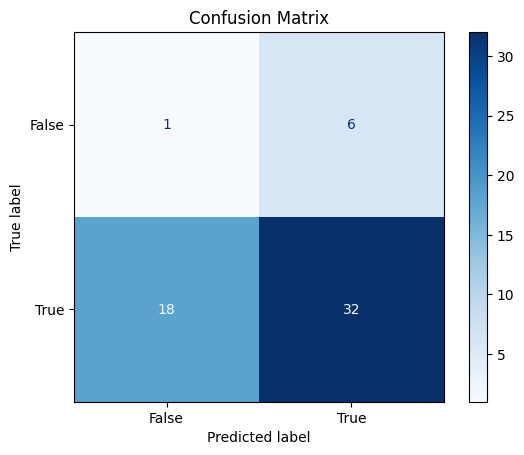

In [7]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# **Interpretation of Results**

The neural network performs much poorer than linear and logistic regression, it just overfits the data, and predict everything as 1. Neural network might be too complex for the data set with a clear correlation between the features(FPKM value of each gene) and the target variable(Cancer or not).

For the neural network itself, I tried some smaller ones and some bigger ones with more layers and nodes, but the results are all similar. My machine cannot handle more nodes, so I cannot try a very big neural network. But I think the neural network is not suitable for this data set.